### **Exploratory Data Analysis on Crime (Jan 2020 - July 2024)**  

This project focuses on analyzing crime trends from January 2020 to July 2024 using an exploratory data analysis (EDA) approach.  

#### **Data Cleaning & Handling Missing Values:**  
- Identified missing values in two key columns: **"Weapon Used"** and **"Date Case Closed"**.  
- For **"Weapon Used"**:  
  - Some entries contained "None," indicating no weapon was used.  
  - Used the `fillna()` function to replace missing values with **"No weapon"** for consistency.  
- For **"Date Case Closed"**:  
  - The column had "Yes" (case closed) and "No" (case open).  
  - Missing dates were either kept as **NaT (Not a Time)** or filled with **"Ongoing"**, but the latter required datatype adjustments.  
- Created a **"Case Duration"** column by subtracting **Date Registered** from **Date Closed** to analyze case resolution times.  

#### **Analysis & Insights:**  
- Examined crime trends across different **years and months**.  
- Analyzed crime distribution by:  
  - **Type of crime** and associated **weapons used**.  
  - **Victim age groups** and their categorization.  
  - **Crime rates by state**, using a **heatmap visualization** to highlight high-crime areas.  

This analysis provides valuable insights into crime patterns, helping to understand trends and factors affecting crime rates over time.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/crime_dataset_india.csv")

In [ ]:
data

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed
0,1,02-01-2020 00:00,01-01-2020 00:00,01-01-2020 01:11,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,NaN
1,2,01-01-2020 19:00,01-01-2020 01:00,01-01-2020 06:26,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No,NaN
2,3,02-01-2020 05:00,01-01-2020 02:00,01-01-2020 14:30,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,NaN
3,4,01-01-2020 05:00,01-01-2020 03:00,01-01-2020 14:46,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes,29-04-2020 05:00
4,5,01-01-2020 21:00,01-01-2020 04:00,01-01-2020 16:51,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes,08-01-2020 21:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40155,40156,01-08-2024 16:00,07-31-2024 03:00,31-07-2024 05:05,Kolkata,312,COUNTERFEITING,78,F,Firearm,Other Crime,12,No,NaN
40156,40157,31-07-2024 14:00,07-31-2024 04:00,31-07-2024 04:14,Mumbai,300,ILLEGAL POSSESSION,75,F,NaN,Other Crime,2,Yes,29-09-2024 14:00
40157,40158,02-08-2024 03:00,07-31-2024 05:00,31-07-2024 21:33,Kanpur,423,VEHICLE - STOLEN,68,M,Other,Violent Crime,6,No,NaN
40158,40159,01-08-2024 19:00,07-31-2024 06:00,31-07-2024 11:05,Patna,311,SEXUAL ASSAULT,11,M,Blunt Object,Violent Crime,1,No,NaN


In [ ]:
data.columns

Index(['Report Number', 'Date Reported', 'Date of Occurrence',
       'Time of Occurrence', 'City', 'Crime Code', 'Crime Description',
       'Victim Age', 'Victim Gender', 'Weapon Used', 'Crime Domain',
       'Police Deployed', 'Case Closed', 'Date Case Closed'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40160 entries, 0 to 40159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Report Number       40160 non-null  int64 
 1   Date Reported       40160 non-null  object
 2   Date of Occurrence  40160 non-null  object
 3   Time of Occurrence  40160 non-null  object
 4   City                40160 non-null  object
 5   Crime Code          40160 non-null  int64 
 6   Crime Description   40160 non-null  object
 7   Victim Age          40160 non-null  int64 
 8   Victim Gender       40160 non-null  object
 9   Weapon Used         34370 non-null  object
 10  Crime Domain        40160 non-null  object
 11  Police Deployed     40160 non-null  int64 
 12  Case Closed         40160 non-null  object
 13  Date Case Closed    20062 non-null  object
dtypes: int64(4), object(10)
memory usage: 4.3+ MB


In [ ]:
data.shape

(40160, 14)

In [ ]:
data.isnull().sum()

,0
Report Number,0
Date Reported,0
Date of Occurrence,0
Time of Occurrence,0
City,0
Crime Code,0
Crime Description,0
Victim Age,0
Victim Gender,0
Weapon Used,5790


In [ ]:
print(data['Weapon Used'].isnull().sum())

5790


In [ ]:
print(data[data['Weapon Used'].isnull()])

       Report Number     Date Reported Date of Occurrence Time of Occurrence  \
13                14  02-01-2020 22:00   01-01-2020 13:00   01-01-2020 17:46   
14                15  02-01-2020 00:00   01-01-2020 14:00   01-01-2020 22:28   
18                19  02-01-2020 20:00   01-01-2020 18:00   02-01-2020 10:42   
27                28  02-01-2020 15:00   01-02-2020 03:00   02-01-2020 20:11   
29                30  04-01-2020 23:00   01-02-2020 05:00   02-01-2020 09:35   
...              ...               ...                ...                ...   
40125          40126  01-08-2024 02:00   07-29-2024 21:00   30-07-2024 05:05   
40130          40131  31-07-2024 00:00   07-30-2024 02:00   30-07-2024 23:21   
40136          40137  01-08-2024 09:00   07-30-2024 08:00   30-07-2024 18:02   
40151          40152  01-08-2024 00:00   07-30-2024 23:00   30-07-2024 23:10   
40156          40157  31-07-2024 14:00   07-31-2024 04:00   31-07-2024 04:14   

            City  Crime Code    Crime D

In [ ]:
data['Weapon Used'] = data['Weapon Used'].replace('None', pd.NA)
data['Weapon Used'].fillna('No Weapon', inplace=True)

<ipython-input-13-0996070cd14f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Weapon Used'].fillna('No Weapon', inplace=True)


In [ ]:
print(data['Weapon Used'].unique())

['Blunt Object' 'Poison' 'Firearm' 'Other' 'Knife' 'Explosives'
 'No Weapon']


In [ ]:
data.columns

Index(['Report Number', 'Date Reported', 'Date of Occurrence',
       'Time of Occurrence', 'City', 'Crime Code', 'Crime Description',
       'Victim Age', 'Victim Gender', 'Weapon Used', 'Crime Domain',
       'Police Deployed', 'Case Closed', 'Date Case Closed'],
      dtype='object')

In [ ]:
data['Date Reported'] = pd.to_datetime(data['Date Reported'], errors='coerce')
data['Date Case Closed'] = pd.to_datetime(data['Date Case Closed'], errors='coerce')
data['case duration'] = (data['Date Case Closed'] - data['Date Reported']).dt.days

<ipython-input-16-e710de8742b7>:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date Case Closed'] = pd.to_datetime(data['Date Case Closed'], errors='coerce')


In [ ]:
data.head()

,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed,case duration
0,1,2020-02-01 00:00:00,01-01-2020 00:00,01-01-2020 01:11,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,NaT,NaN
1,2,2020-01-01 19:00:00,01-01-2020 01:00,01-01-2020 06:26,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No,NaT,NaN
2,3,2020-02-01 05:00:00,01-01-2020 02:00,01-01-2020 14:30,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,NaT,NaN
3,4,2020-01-01 05:00:00,01-01-2020 03:00,01-01-2020 14:46,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes,2020-04-29 05:00:00,119.0
4,5,2020-01-01 21:00:00,01-01-2020 04:00,01-01-2020 16:51,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes,2020-01-08 21:00:00,7.0


<ipython-input-18-4861240d6de5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Year Reported', data=data, palette='coolwarm')


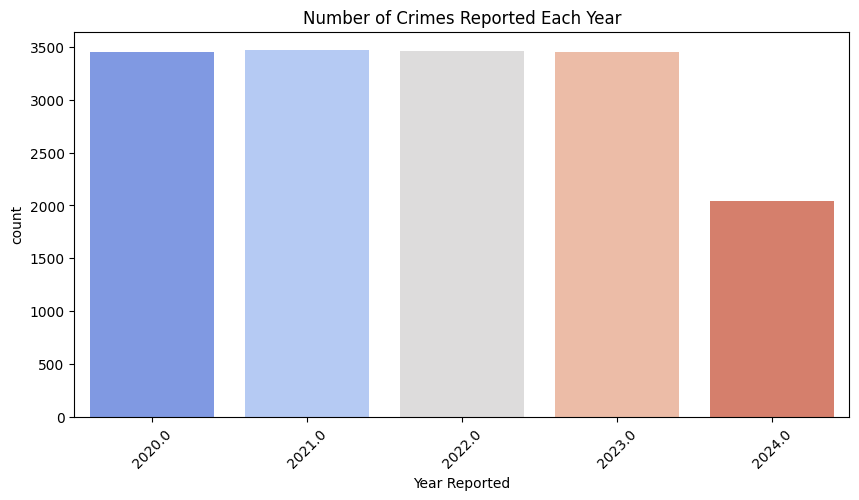

In [ ]:
data['Year Reported'] = data['Date Reported'].dt.year
plt.figure(figsize=(10, 5))
sns.countplot(x='Year Reported', data=data, palette='coolwarm')
plt.title('Number of Crimes Reported Each Year')
plt.xticks(rotation=45)
plt.show()

<ipython-input-19-b78f0ee9e4d2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Month Reported', data=data, palette='viridis')


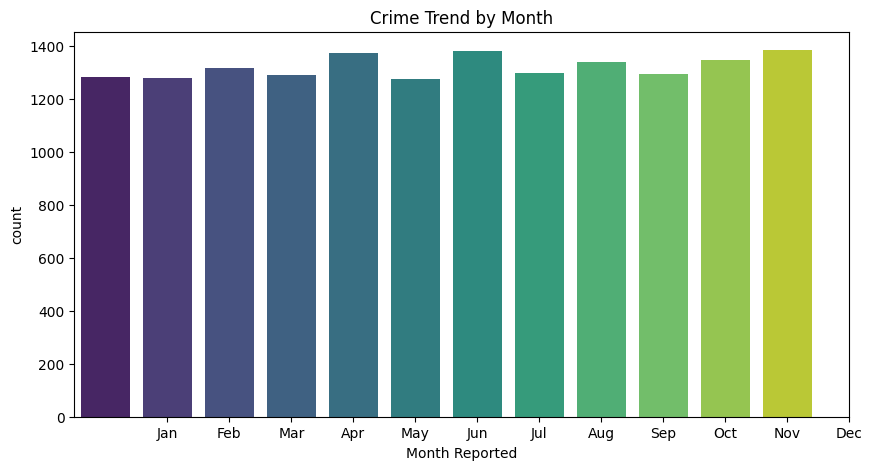

In [ ]:
data['Month Reported'] = data['Date Reported'].dt.month
plt.figure(figsize=(10, 5))
sns.countplot(x='Month Reported', data=data, palette='viridis')
plt.title('Crime Trend by Month')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

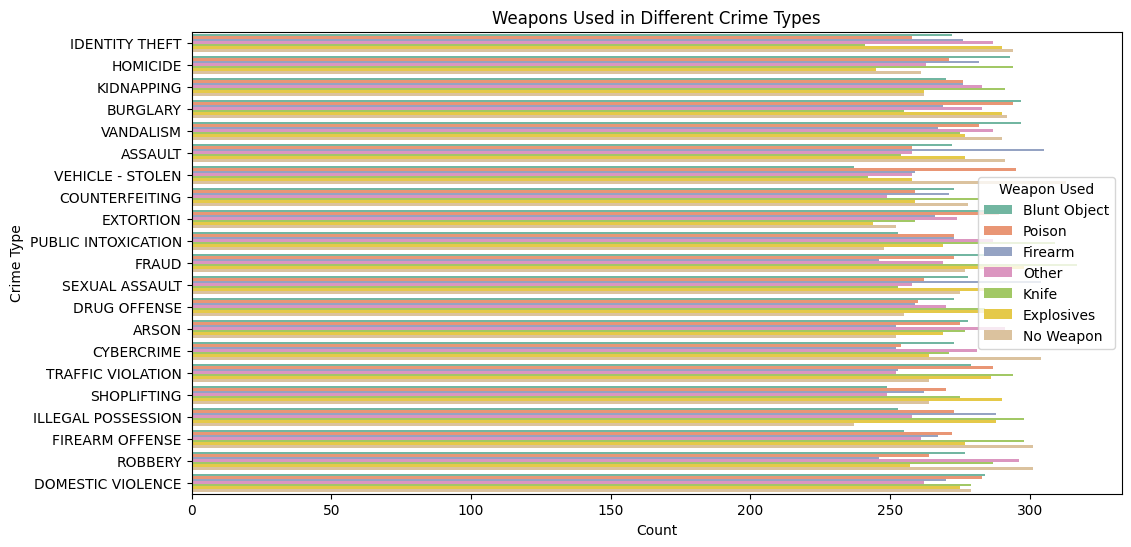

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(y='Crime Description', hue='Weapon Used', data=data, palette='Set2')
plt.title('Weapons Used in Different Crime Types')
plt.xlabel('Count')
plt.ylabel('Crime Type')
plt.show()

<ipython-input-21-772baf786fc5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Crime Description', y='Victim Age', data=data, palette='coolwarm')


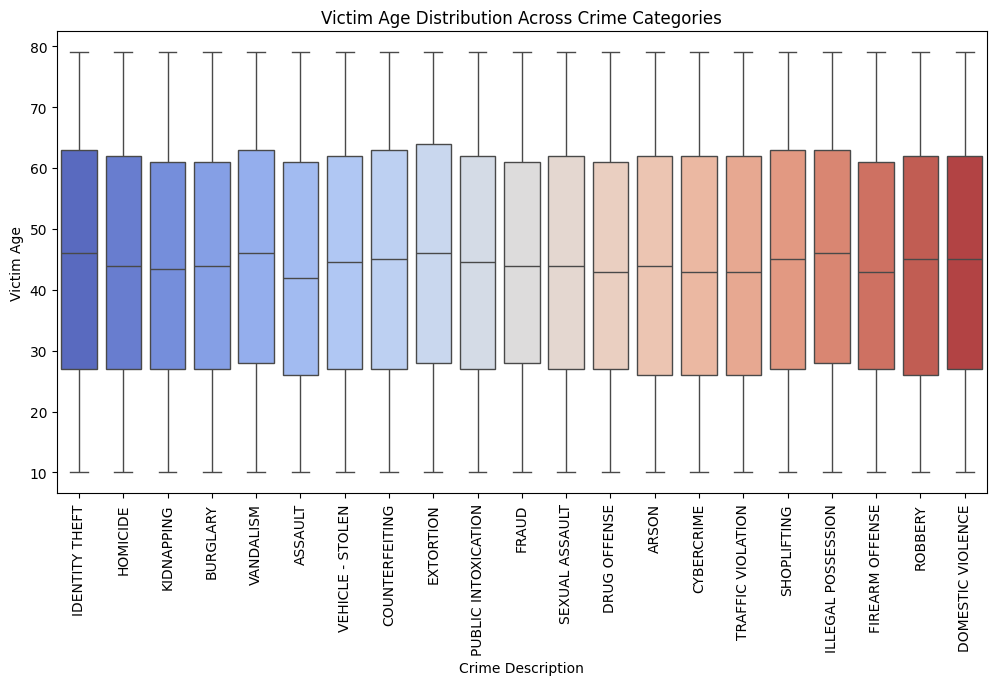

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Crime Description', y='Victim Age', data=data, palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Victim Age Distribution Across Crime Categories')
plt.show()

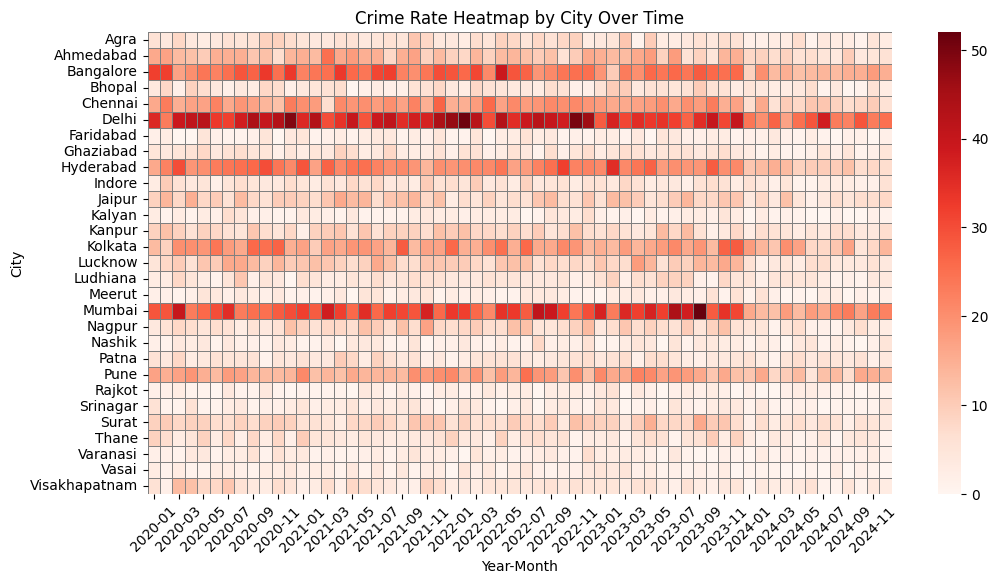

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'Date Reported' is in datetime format
data['Date Reported'] = pd.to_datetime(data['Date Reported'])

# Extract year-month for grouping
data['Year-Month'] = data['Date Reported'].dt.to_period('M')

# Aggregate crime count per city and time period
crime_heatmap = data.groupby(['Year-Month', 'City']).size().unstack().fillna(0)

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(crime_heatmap.T, cmap='Reds', linewidths=0.5, linecolor='gray')

plt.xlabel('Year-Month')
plt.ylabel('City')
plt.title('Crime Rate Heatmap by City Over Time')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()